# Empezando a visualizar ...

[Matplotlib](https://matplotlib.org/) es la librería por defecto para visualizar en Python. Nace allá por 2002, como un parche de Ipython para activar el estilo de ploteo de [MATLAB](https://la.mathworks.com/products/matlab.html) (de allí algunas de sus similitudes). 

En esta clase, vamos a analizar su mecánica o modo de funcionamiento general. Nuestro objetivo será fijar los conceptos fundamentales, identificando cuáles son los usos más comunes para sus clases y métodos.

Para generar nuestras visualizaciones vamos a trabajar con la Encuesta Permanente de Hogares que realiza trimestralmente el Instituto de Estadísticas y Censos ([INDEC](https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos)). Comencemos!



<p float="left">
  <img src="https://matplotlib.org/_static/logo2_compressed.svg" width="75%" />
  <img src="https://github.com/institutohumai/pyeph/blob/main/docs/_static/logo.png?raw=true" width="20%" /> 
</p>

Gracias a esta [fabulosa librería](https://github.com/institutohumai/pyeph) desarrollada por la gente del [Instituto Humai](https://ihum.ai/) vamos a poder consultar fácilmente los distintos trimestres de las bases de hogares e individuos. 

Es muy sencillo utilizarla, sólo debemos indicar el tipo de base y el período. Empecemos por instalarla!

In [1]:
# instalamos pyeph, una librería que facilita la consulta y procesamiento de la Encuesta Permanente de Hogares
#!pip install pyeph

# y researchpy, algo que vamos a usar más adelante
#!pip install researchpy

In [1]:
# importamos pyeph y pandas
import pyeph
import pandas as pd

In [2]:
#!pip install matplotlib --upgrade

import matplotlib as mpl
mpl.__version__

'3.5.3'

In [3]:
# con el parametro "base_type" definimos la base a consultar
eph_h = pyeph.get(data="eph", year=2021, period=4, base_type='hogar') # individual para individuos


Obtenido con exito: base_hogar_2021T4.zip 


Un documento que no podemos dejar de tener a mano cuando trabajamos con la EPH, es el [diseño de registro](https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_registro_4T2021.pdf). Con esto es con lo que vamos a saber qué preguntarle a la base de datos.

In [4]:
# veamos el diseño de registro para ver qué es cada columna en nuestra base de hogares
eph_h.columns

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2',
       'VII2_3', 'VII2_4'],
      dtype='object')

# Usos y costumbres

Algo que puede resultar confuso con Matplotlib son los distintos caminos que podemos tomar para llegar a un mismo gráfico. A continuación, vamos a explorar las tres formas más comunes o usuales que tenemos para generar una visualización. 

## 1. El método `plot`

El método `.plot()` es propio de la clase Pandas.DataFrame, y suele ser una alternativa muy práctica cuando queremos explorar rápidamente alguna distribución o serie de valores.

Ahora bien, este método toma algunas decisiones por nosotros. Principalmente la forma de la figura sobre la que se grafica.

Vayamos más a fondo con el método plot y algunos de sus parámetros.

In [5]:
# total de hogares (sin expandir!)
len(eph_h)

17037

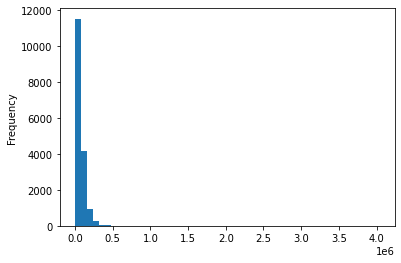

In [13]:
# Y vamos a ver, por ejemplo, la distribución del Ingreso Total Familiar 
eph_h.ITF.plot(kind='hist', bins=50);

Por un lado, vemos que la mayoría de los respondentes se ubican en el intervalo 0 - 500.000 $ARS (recuerden que el eje X se encuentra en notación científica con lo cual debemos multiplicar cada xtick por 10**6).

In [14]:
#... es decir, algo así como
'${:,.0f}'.format((0.5*10**6))

'$500,000'

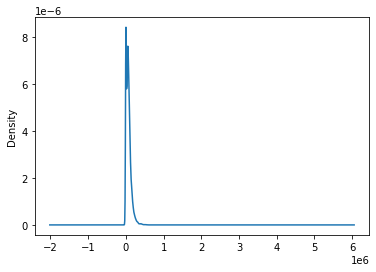

In [ ]:
# también podríamos hacer un gráfico de densidad para ver un resultado continuo 
eph_h.ITF.plot(kind='kde');

Con esto, identificamos una primera forma o estrategia de graficación. El mismo método `plot` de una serie de pandas.

Pero `matplotlib` nace como una alternativa en python para MATLAB, por lo que mucho de su sintaxis refleja esa relación. Una línea o estilo asociada con esto podría verse así ...

## 2. Usando pyplot como si fuese MATLAB

In [15]:
import matplotlib.pyplot as plt

Una segunda alternativa es el modulo `pyplot` que, como verán, lo importamos desde `matplotlib` bajo el alias `plt`.  Utilicemoslo para graficar el mismo histograma de ingresos con su respectiva función de densidad.


In [20]:
# a ver que dice la docstring ...
plt.hist?

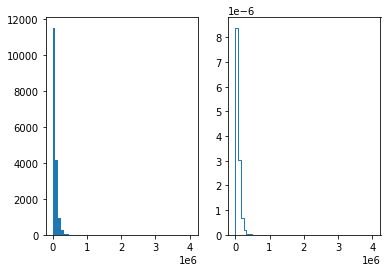

In [17]:
# primero creamos la figura para el plot
plt.figure()

# creamos el primero de dos paneles
plt.subplot(1,2,1) # de una fila y dos columnas 
plt.hist(eph_h.ITF, bins=50)

# y ahora el segundo (si, el tercer numero corresponde al posicional)
plt.subplot(1,2,2)
plt.hist(eph_h.ITF, bins=50, density=True, histtype='step', fill=False);

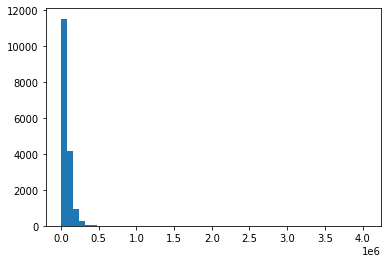

In [18]:
plt.hist(eph_h.ITF, bins=50);

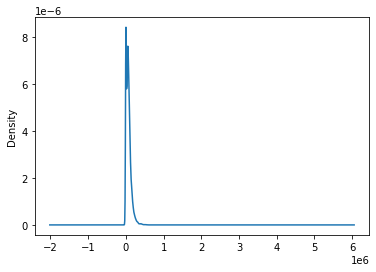

In [19]:
eph_h.ITF.plot(kind='kde');

### 2.1. Cómo interpretar la función de densidad de kernel o kde plot

Lo primero que hay que entender es que este plot es muy útil para ver probabilidades de ocurrrencia para los valores de una variable en un determinado rango.

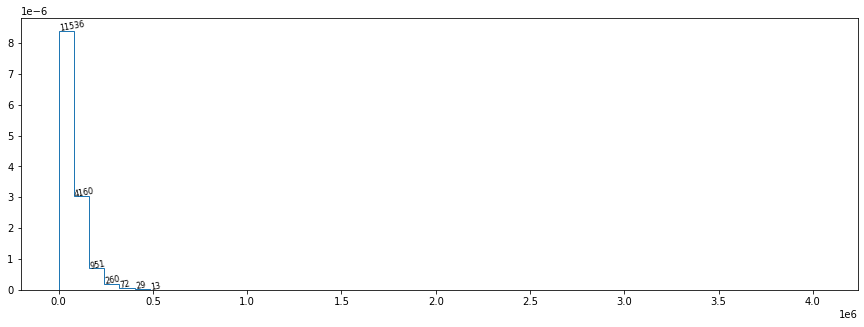

In [21]:
import numpy as np

plt.figure(figsize = (15, 5)) # instanciamos la figura
density, bins, _ = plt.hist([eph_h.ITF], # generamos un array de bins y densidad
                             density=True, 
                             bins=50, 
                             histtype='step', # desde acá manejamos el tipo de hist 
                             fill=False) # aca llenamos o no el área bajo la curva

count, _ = np.histogram(eph_h.ITF, bins) # obtenemos el conteo por bins

for x, y, num in zip(bins, density, count):
  if num > 10: # y hacemos algunas anotaciones sobre las barras
    plt.text(x, y, num, fontsize=8, rotation=10)

Interpretemos este gráfico de densidad. Primero, el eje x. Hastá acá nada nuevo, la mayoría de los hogares se siguen ubicando entre 0 y 500.000 $ARS como habíamos visto antes. 

Ahora bien, ¿cómo se distribuyen los hogares dentro de este rango? ¿hay algún segmento o área de mayor concentración de casos?

Para ver esto, es necesario entender lo que nos indica el eje y. En ese sentido, recordemos que tenemos un total de 17037 hogares, ... 

In [ ]:
# ... de los cuales 
len(eph_h.loc[eph_h.ITF < bins[1]])

11536

In [ ]:
# se encuentran en el primer bin o intervalo de ingresos.
bins[:2]

array([    0., 80700.])

Imaginemos que **sobre este intervalo dibujamos un rectángulo de área 1/17037 (0.00006)** y lo apilamos tantas veces como hogares haya en toda nuestra distribución. 

In [ ]:
# El área total que obtendremos será igual a ...
round((1/17037)*17037)

1

Lo que equivale a la suma de todas estas densidades ...

In [ ]:
'{:.5f}'.format(1/17037) 

'0.00006'

Ahora, si volvemos a hacer lo mismo pero sólo apilamos el equivalente a la totalidad de casos del primer intervalo, 

In [ ]:
# obtendremos sólo una parte del área total que calculamos previamente. 
round((1/17037)*11536,1)

0.7

Entonces, si el área de todos los rectángulos es igual a uno, 
la *altura que alcancen en el eje y* aquellos que apilemos dentro del bin nos estará indicando ... 


In [ ]:
# cuán intensa o frecuente es la cantidad de casos en ese bin  
'{:.6f}'.format((1/17037)*11536/bins[1])

'0.000008'

In [ ]:
# considerando un máximo de área posible 
'{:.6f}'.format((1/17037)*(11536)/bins[1]+(1/17037)*(17037-11536)/bins[1])

'0.000012'

En otras palabras, cuántas veces se repiten los hogares de cierto rango de ingresos respecto del ancho delimitado por el mismo.

Pensemos así a la curva de densidad como una unidad de medida de "ocurrencia en veces". Donde, lo que indica el *eje y* es la cantidad de veces que se repite un hogar en el rango del bin o franja de ingresos.

Lo que tiene bastante sentido si revisamos el último **ytick** del gráfico de densidad  ...

In [ ]:
# y vemos que esta medida  
'{:.6E}'.format(8*(10**-6))

'8.000000E-06'

In [ ]:
# se encuentra por debajo del alto de la primer barra
'{:.6E}'.format((1/17037)*11536/bins[1])

'8.390514E-06'

Y es, en este sentido, que las densidades son útiles para calcular probabilidades de ocurrencia. 

Digamos, que nos interesa conocer la probabilidad de que un nuevo hogar seleccionado al azar corresponda a determinado rango de ingresos.

In [22]:
# Por ejemplo, aquellos entre 0 y 80700 $ARS.
round(0.000009 * bins[1],1)

0.7

Y así es que podemos complementar un poco la lectura inicial de nuestro histograma. Ya no sólo sabemos que la mayoría de los hogares se ubica en un rango inferior a los 500.000 $ARS.

Ahora, la función de densidad nos permite saber que la probabilidad de que un hogar gane entre 0 y 80700 $ARS está en torno al 70%.

Repitamos la misma operación con el resto de los bins para ver cómo queda conformada el área de probabilidad bajo la curva de densidad.


In [23]:
bar_bin_heights = [] # acá vamos a almacenar las alturas o densidades de las barras en cada bin
total_area_heights = [] # y acá, lo que resta para llegar a su altura o densidad máxima.
bin_pcts = [] # acá vamos a guardar el porcentaje de área que representan los casos del bin
tot_pcts = [] # y acá, lo que falta para llegar al área total o total de casos de la distribución.

hogares = len(eph_h)
bar_surface = 1/hogares
idx = 0

for b in bins[1:]: # recorremos cada bin ...
  bar_bin_width = b # y definimos su ancho, 
  bar_bin_height = bar_surface*count[idx]/bar_bin_width #para ver cuánto pesan los casos del bin  
  bar_bin_heights.append(bar_bin_height)
  # hasta acá, calculamos el límite de la función de densidad o área bajo la curva

  # ahora vamos a calcular el área sobre la curva de densidad
  total_area_height = bar_surface*(hogares-count[idx])/bar_bin_width #calculando lo que falta para llegar al máximo  
  total_area_heights.append(total_area_height)
  
  bin_pct = bar_surface*count[idx] #acá calculamos el porcentaje de área cubierto
  tot_pct = bar_surface*(hogares-count[idx]) #y el remanente para llegar a la totalidad (1)
  bin_pcts.append(bin_pct)
  tot_pcts.append(tot_pct)
  idx+=1

Grafiquemos primero qué porcentaje de área ocupan los casos del bin respecto del máximo o total de casos de la distribución.

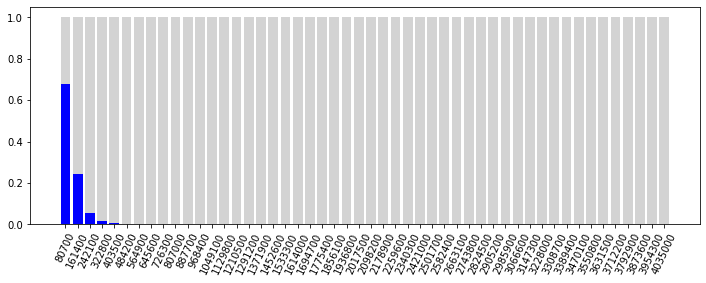

In [24]:
plt.figure(figsize=(12,4))
plt.bar(range(len(bin_pcts)), bin_pcts, color='blue')
plt.bar(range(len(tot_pcts)), tot_pcts, bottom=bin_pcts, color='lightgrey')
labels = [int(i) for i in bins[1:]]
plt.xticks(range(len(tot_pcts)), labels, rotation='65');

En color azul, se puede ver cómo apilando 1/17037 (nuestra unidad de densidad) tantas veces como casos haya en el bin queda definido el límite superior de la curva de densidad.

El área delimitada bajo esa curva es lo que se utiliza para estimar la probabilidad de ocurrencia de un nuevo caso seleccionado al azar.



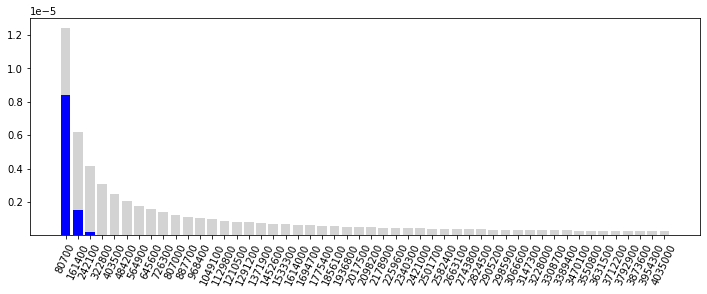

In [27]:
plt.figure(figsize=(12,4))
plt.bar(range(len(bar_bin_heights)), bar_bin_heights, color='blue')
plt.bar(range(len(total_area_heights)), total_area_heights, bottom=bar_bin_heights, color='lightgrey')
plt.xticks(range(len(total_area_heights)), labels, rotation=65);

In [28]:
# Por ejemplo, 
altura = density[0]
ancho = bins[1] 
superficie = altura * ancho
print('la probabilidad de que un hogar gane entre 0 y 80700 será de {}'.format(round(superficie,1)))

la probabilidad de que un hogar gane entre 0 y 80700 será de 0.7


In [29]:
# o el segundo bin, 
altura = density[1]
ancho = bins[2] - bins[1]
superficie = altura * ancho
print('la probabilidad de que un hogar gane entre 80700 y 161400 será de {}'.format(round(superficie,1)))

la probabilidad de que un hogar gane entre 80700 y 161400 será de 0.2


Y si seguimos así con todos ...

In [30]:
sups = []

for b in range(len(bins)):
  if b == 0: # si estamos parados en el primer bin
    altura = density[0]
    ancho = bins[1] 
    superficie = altura * ancho
    sups.append(superficie)
  elif b == len(bins)-1: # o estamos parados en el último y no en el primero
    altura = density[-1]
    ancho = bins[b] - bins[b-1] 
    superficie = altura * ancho
    sups.append(superficie)
  else: # para todo lo demás usamos el mismo cálculo
    altura = density[b]
    ancho = bins[b+1] - bins[b]
    superficie = altura * ancho
    sups.append(superficie) 

In [31]:
# Veremos que las áreas de todos los rectángulos bajo la curva es igual a ...
round(np.sum(sups))

1

## 3. Interfaz orientada a objetos

Vamos a llamar así a la tercer forma de uso de `matplotlib`. Esta aproximación ofrece mucho más control sobre las figuras. 
Fundamentalmente porque en lugar de haber una noción implícita, ahora las funciones de ploteo son métodos de figuras y ejes que existen explícitamente. 

La noción fundamental es la **Figura**, es como el lienzo del pintor. Nuestros gráficos van a estar dentro de una **figura**. Y a su vez, dentro de cada figura vamos a tener los **Ejes**. Cuál es la diferencia? Fundamentalmente que una figura puede tener más de un par de **ejes**. 

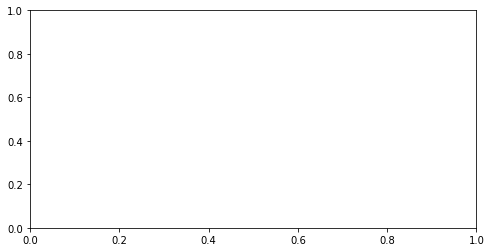

In [32]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()

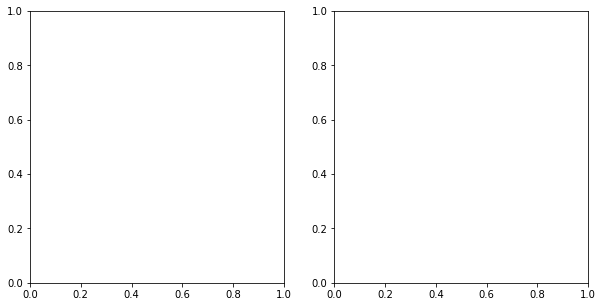

In [33]:
# agrandamos la figura 
fig = plt.figure(figsize=(10,5))
# la disponemos en una columna con dos ejes
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

Matplotlib también cuenta con un método muy útil para particionar la figura en distintas cantidades de columnas y ejes ...

In [ ]:
# veamos su documentacion
plt.subplots?

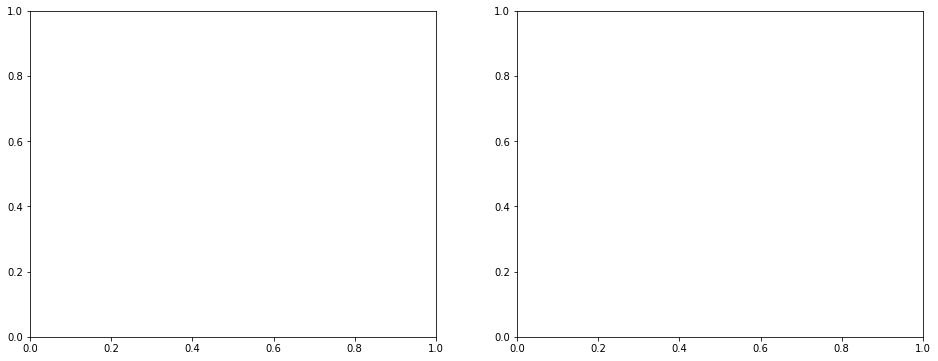

In [ ]:
# asi, por ejemplo ,podríamos crear una figura de una columna y dos ejes
f,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,6))

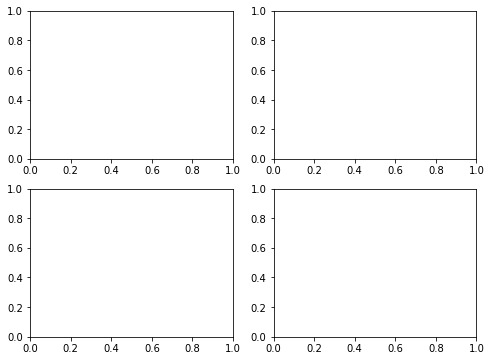

In [ ]:
# o de dos ejes y dos columnas
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(8,6))

Ahora sí, una vez que definimos la disposición de nuestro gráfico, esto es, en cuántas columnas y ejes vamos a dividir la figura, ya estamos listos para plotear ...

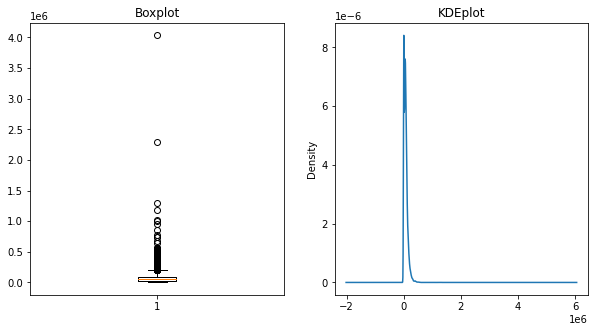

In [35]:
# En una figura de dos ejes
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# podemos elegir un método de visualización del mismo objeto eje
ax1.boxplot(eph_h.ITF)
# o bien pasar el eje como parametro del método plot de una serie de pandas
eph_h.ITF.plot(kind='kde', ax=ax2)
ax1.set_title('Boxplot')
ax2.set_title('KDEplot');

De momento, podemos ver que incorporar la noción de figura y ejes, permite ampliar el espectro de posibilidades de visualización. 

Veamos ahora cómo podemos lograr una mejor representación de nuestra serie de ingresos. Para ello, es importante respetar algunos criterios para que el gráfico sea claro y comunique lo que pretende.

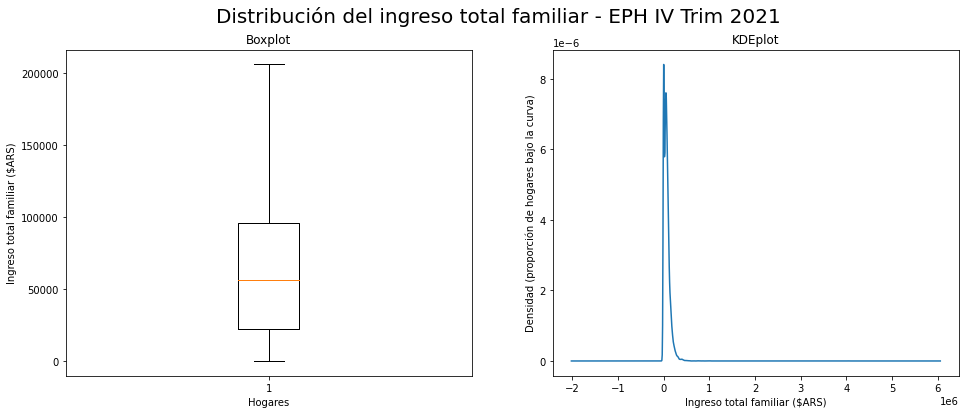

In [36]:
# primero, dispongamos figura y ejes en una sola linea
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(16,6))

# para ganar claridad en la distribución del boxplot, eliminemos outliers
ax1.boxplot(eph_h.ITF, showfliers=False)
eph_h.ITF.plot(kind='kde', ax=ax2, legend=None)

# ordenamos bien los titulos
plt.suptitle('Distribución del ingreso total familiar - EPH IV Trim 2021', fontsize=20)
ax1.set_title('Boxplot')
ax2.set_title('KDEplot')

# renombramos los ejes con su unidad de medida correspondiente
ax1.set_xlabel('Hogares')
ax1.set_ylabel('Ingreso total familiar ($ARS)')

ax2.set_xlabel('Ingreso total familiar ($ARS)')
ax2.set_ylabel('Densidad (proporción de hogares bajo la curva)');

In [37]:
# desactivamos la notación científica para ver algunos estadísticos
pd.options.display.float_format = '{:.2f}'.format
tendencia_central = eph_h.ITF.describe()
tendencia_central

count     17037.00
mean      68734.01
std       77324.13
min           0.00
25%       22000.00
50%       56000.00
75%       95600.00
max     4035000.00
Name: ITF, dtype: float64

Podríamos seguir ajustando nuestro gráfico un poco más ...

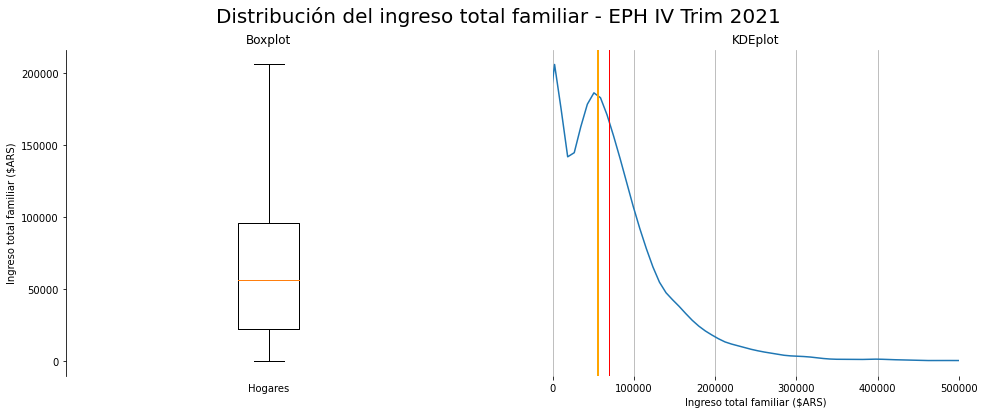

In [38]:
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(16,6))

ax1.boxplot(eph_h.ITF, showfliers=False)
eph_h.ITF.plot(kind='kde', ax=ax2, legend=None)

plt.suptitle('Distribución del ingreso total familiar - EPH IV Trim 2021', fontsize=20)
ax1.set_title('Boxplot')
ax2.set_title('KDEplot')

ax1.set_xlabel('Hogares')
ax1.set_ylabel('Ingreso total familiar ($ARS)')

ax2.set_xlabel('Ingreso total familiar ($ARS)')
ax2.set_ylabel('Densidad (proporción de hogares bajo la curva)')

# eliminamos las etiquetas de ejes que no son necesarias
ax1.set_xticks([])
ax2.set_yticks([]) # como dijimos antes, la unidad de densidad no es muy útil sin el ancho del bin
ax2.set_ylabel('')

# eliminamos bordes
for ax in [ax1,ax2]:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.grid(axis='x')

# agregamos algunas medidas de tendencia central como referencia de nuestra distribución
ax2.axvline(tendencia_central['mean'], color='red', linewidth=1)
ax2.axvline(tendencia_central['50%'], color='orange', linewidth=2)
# y restringimos la serie de densidad para verla mejor
ax2.set_xlim(0,500000);

# Dimensionando la asequibilidad del alquiler

No en vano estuvimos trabajando sobre nuestra serie de ingresos. Conocer el comportamiento de ciertas variables base (como pueden ser los ingresos o algunas características sociodemográficas de la población) puede resultar muy útil para establecer relaciones con distintos aspectos de nuestra ciudad. Por ejemplo, cuan caro o barato es vivir allí. 

Supongamos que nos interesa estudiar cuál es la capacidad de compra en un mercado de bienes y servicios habitacionales. Tomemos de referencia el precio de algo estándar, como puede ser el alquiler de un departamento de 1, 2 y 3 en Ciudad de Buenos Aires.

Tomaremos [estos valores de referencia](https://www.estadisticaciudad.gob.ar/eyc/wp-content/uploads/2022/02/ir_2022_1633.pdf) ya que corresponden al mismo trimestre de nuestra base de hogares.

In [39]:
# precios por tipologia de departamento en alquiler
amb_1, amb_2, amb_3 = 30000, 40000, 65000

Ahora, volvamos a nuestro diseño de registro para armar algunos perfiles de hogar. La variable `IX_TOT` nos indica la cantidad total de miembros y `IX_MEN10` la de aquellos menores de 10 años. 

Vamos a valernos de las dos para filtrar nuestra base de datos y perfilar los ...

* Hogares de hasta dos adultos sin menores.
* Hogares de dos adultos con un menor.
* Hogares de dos adultos con dos menores.

In [40]:
# Hasta dos adultos sin hijos
tipo_a = eph_h.loc[(eph_h['IX_TOT']<=2)&(eph_h['IX_MEN10']==0)].copy()

# Dos adultos y un menor de 10 años
tipo_b = eph_h.loc[(eph_h['IX_TOT']==3)&(eph_h['IX_MEN10']==1)].copy()

# Dos adultos con dos menores de 10 años
tipo_c = eph_h.loc[(eph_h['IX_TOT']==4)&(eph_h['IX_MEN10']==2)].copy()

In [41]:
# Ojo que no es la totalidad de los hogares
len(tipo_a) + len(tipo_b) + len(tipo_c)

9341

In [42]:
# Estamos trabajando solamente con una parte de ellos
len(tipo_a), len(tipo_b), len(tipo_c)

(7823, 987, 531)

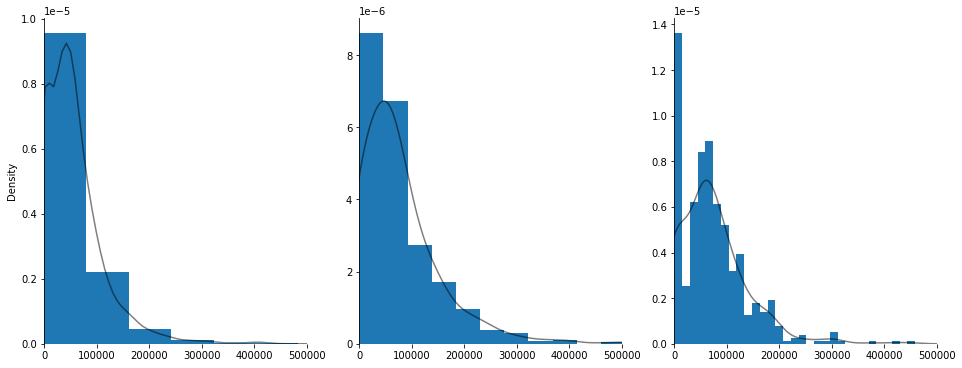

In [43]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, nrows=1, figsize=(16,6))

dens_a, bins_a, _ = ax1.hist(tipo_a.ITF, bins=50, density=True) # reservamos algunas variables
xy_a = tipo_a.ITF.plot(kind='kde', color='k', alpha=0.5, ax=ax1).get_lines()[0].get_xydata()

dens_b, bins_b, _ = ax2.hist(tipo_b.ITF, bins=50, density=True)
xy_b = tipo_b.ITF.plot(kind='kde', color='k', alpha=0.5, ax=ax2).get_lines()[0].get_xydata()

dens_c, bins_c, _ = ax3.hist(tipo_c.ITF, bins=50, density=True)
xy_c = tipo_c.ITF.plot(kind='kde', color='k', alpha=0.5, ax=ax3).get_lines()[0].get_xydata()

for ax in [ax1, ax2, ax3]:
  ax.set_xlim(0, 500000)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  
  if ax not in [ax1]:
    ax.set_ylabel('')

Resulta interesante ver que, a medida que somos más específicos con nuestro filtro, el área bajo la curva o proporción de casos va disminuyendo (sobretodo entre el primer y el tercer plot). Por lo tanto, podríamos pensar que el hecho de que el `n` de nuestra muestra disminuya es un signo de que lo que podamos llegar a conocer o inferir sobre una población será cada vez menor y con menos robustez.

### 2.2. Un último comentario sobre la curva de densidad ...

Repasemos esta idea de una manera un poco más intuitiva. Dijimos entonces que, lo que esté debajo de nuestra curva o función de densidad, será lo que podemos conocer. Entonces la superficie de ese área es lo que nos indicará la probabilidad de ocurrencia del bin. 
Entonces, si sumamos el área de los intervalos podríamos conocer esa superficie ...

In [44]:
# Definimos las bases y las alturas del área
bin1_coords = []

for p in xy_a:
  if (p[0] >= 0) and (p[0]<=85000):
    print(p[0],p[1])
    bin1_coords.append([p[0],p[1]])

2019.5195195195265 7.899012103330245e-06
10097.597597597633 8.010592932607504e-06
18175.675675675506 7.908439580236402e-06
26253.75375375361 8.382374406011821e-06
34331.83183183172 8.988165436733583e-06
42409.909909909824 9.237700638104254e-06
50487.98798798793 8.977788566307065e-06
58566.066066066036 8.187232242599719e-06
66644.14414414414 7.066485350813299e-06
74722.22222222225 5.9392833795000256e-06
82800.30030030012 4.976736744990474e-06


In [45]:
# calculamos las superficies de los bins
sups=[]

for i in range(len(bin1_coords)):
  if i == 0:
    b = bin1_coords[0][0]
    a = bin1_coords[0][1]
    sup = b*a
    sups.append(sup)
  elif i == len(bin1_coords)-1:
    b1 = bin1_coords[len(bin1_coords)-1][0]
    b2 = bin1_coords[len(bin1_coords)-2][0]
    b = b1-b2
    a = bin1_coords[len(bin1_coords)-1][1]
    sup = b*a
    sups.append(sup)
  else:
    b1 = bin1_coords[i][0]
    b2 = bin1_coords[i-1][0]
    b = b1-b2
    a = bin1_coords[i][1]
    sup = b*a
    sups.append(sup)

In [46]:
# la proporción de area bajo la curva (apilando las áreas de las barras!)
np.sum(sups)

0.643415302393548

Contrastemos este resultado con algún otro método. Uno muy conocido es `AUC` de [scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html). 

In [47]:
# Formateamos nuestro array de coordenadas
xs, ys = zip(*bin1_coords)

In [48]:
from sklearn.metrics import auc

print('AUC estimado con sklearn.metrics.auc: {}'.format(auc(xs,ys)))

AUC estimado con sklearn.metrics.auc: 0.6392662775211077


Ahora sí, comparemos este resultado con el área bajo la curva de nuestro hogar tipo más específico (el tipo c que es el que tenía más filtros) ...

In [49]:
# calculamos las coordenadas xy del primer bin
bin1_coords_c = []

for p in xy_c:
  if (p[0] >= 0) and (p[0]<=85000):
    print(p[0],p[1])
    bin1_coords_c.append([p[0],p[1]])

xs_c, ys_c = zip(*bin1_coords_c)

370.3703703703941 4.773108569535369e-06
1851.851851851854 4.870712400323814e-06
3333.333333333372 4.957885173418931e-06
4814.814814814832 5.035109951689372e-06
6296.296296296292 5.103065655240586e-06
7777.77777777781 5.162607333787963e-06
9259.25925925927 5.214741592472844e-06
10740.74074074073 5.26059794701423e-06
12222.222222222248 5.301397018064392e-06
13703.703703703708 5.33841657216236e-06
15185.185185185168 5.372956474308463e-06
16666.666666666686 5.406303633403729e-06
18148.148148148146 5.439697997069605e-06
19629.629629629664 5.474300589010277e-06
21111.111111111124 5.511164484119333e-06
22592.592592592584 5.551209489380821e-06
24074.074074074102 5.595201148763146e-06
25555.555555555562 5.643734524929127e-06
27037.037037037022 5.697223037151316e-06
28518.51851851854 5.7558924607090475e-06
30000.0 5.819780025163447e-06
31481.481481481518 5.888738393437654e-06
32962.96296296298 5.962444165729338e-06
34444.44444444444 6.04041043596446e-06
35925.925925925956 6.122002836509582e-06
3

In [50]:
# Y efectivamente, el AUC es menor
print('AUC estimado con sklearn.metrics.auc: {}'.format(auc(xs_c,ys_c)))

AUC estimado con sklearn.metrics.auc: 0.5249738870099309


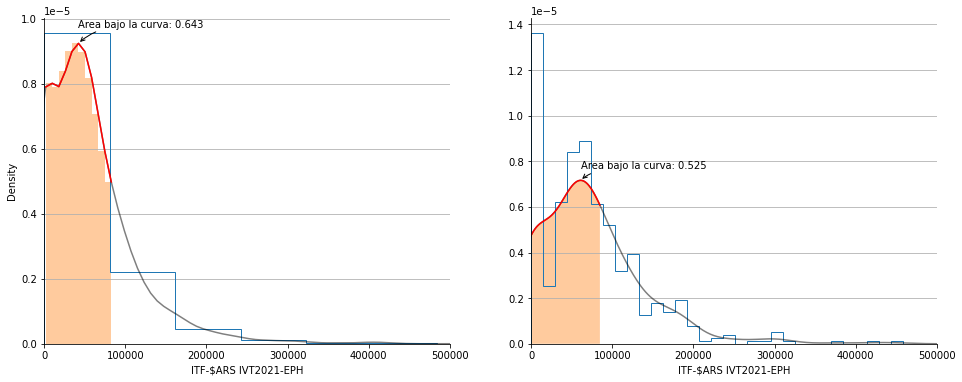

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(16,6))

for ax in [ax1,ax2]:
  if ax == ax1:
    ax.hist(tipo_a.ITF, bins=50, histtype='step', density=True, fill=False)
    tipo_a.ITF.plot(kind='kde', #bw_method=0.2, # con el bandwith podemos ajustar el area de la curva
                    color='k', alpha=0.5, ax=ax)
    
    # guardamos las coordenadas en una nueva variable
    coords_x, coords_y = xs, ys

    # En el primer eje, vemos como calculamos el area apilando rectangulos
    fill_curve='pre'
    area_text='Area bajo la curva: '+str(round(np.sum(sups),3))
    # Coloreamos el area bajo la curva
    ax.plot(coords_x,coords_y, color='red')
    ax.fill_between(coords_x, coords_y, step=fill_curve, alpha=0.4)
    
    # lo usamos mas abajo para hacer las annotations
    max_idx = np.where(coords_y==np.amax(coords_y))
    
  else:
    ax.hist(tipo_c.ITF, bins=50, histtype='step', density=True, fill=False)
    tipo_c.ITF.plot(kind='kde', #bw_method=0.2, # con el bandwith podemos ajustar el area de la curva
                    color='k', alpha=0.5, ax=ax)
    
    coords_x, coords_y = xs_c, ys_c

    # Aca, con una curva suavizada
    fill_curve=None
    area_text='Area bajo la curva: '+str(round(auc(coords_x,coords_y),3))
    ax.plot(coords_x,coords_y, color='red')
    ax.fill_between(coords_x, coords_y, step=fill_curve, alpha=0.4)
    max_idx = np.where(coords_y==np.amax(coords_y))

    ax.set_ylabel('') # apagamos la etiqueta del eje
     
  ax.grid(axis='y')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  
  # Agregamos la etiqueta con la proporcion de area bajo la curva
  ax.annotate(area_text, (coords_x[int(max_idx[0])],
                          coords_y[int(max_idx[0])]),
              xytext = (coords_x[int(max_idx[0])]+0.0000005,
                        coords_y[int(max_idx[0])]+0.0000005),
              arrowprops=dict(arrowstyle="->",
                        connectionstyle="angle3,angleA=0,angleB=45"))
  ax.set_xlabel('ITF-$ARS IVT2021-EPH')
  ax.set_xlim(-0.5, 500000);

# Medidas de asociación

Ahora que sabemos algunas implicancias respecto de cómo se comporta la serie de ingresos para nuestros tres perfiles de hogar, comparésmolos con alguna métrica. Digamos, la diferencia de ingresos.

In [52]:
# esta clase nos va a permitir retiquetar las labels de los ejes
import matplotlib.ticker as mticker

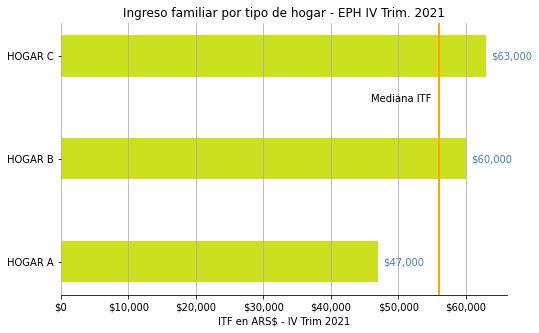

In [53]:
# creamos nuestra figura/ejes
fig,ax = plt.subplots(figsize=(8,5))

# almacenamos las medianas de nuestros perfiles de hogar en un nuevo df
df = pd.DataFrame({'Tipo':['HOGAR A','HOGAR B','HOGAR C'],
                   'ARS$':[tipo_a.ITF.median(), tipo_b.ITF.median(), tipo_c.ITF.median()]})
df.sort_values(by='ARS$', ascending=True, inplace=True)

# Definimos las variables para nuestras barras: sus valores, una etiqueta y el color
bar1, bar1_lab, bar1_col = df['ARS$'], 'ITF p50 -ARS$', '#cde01d'
labels, width = df['Tipo'], 0.4 # las labels iran en el eje y

y = np.arange(len(labels)) # la ubicación de las barras en el eje y
ax.barh(y + width/2, bar1, width, label=bar1_lab, color=bar1_col) # ploteamos las barras horizontales 
        
ax.axvline(eph_h.ITF.median(), color='orange', linewidth=2) 
ax.annotate('Mediana ITF', xy=(46000,1.75), xycoords='data') # ploteamos la mediana

ax.grid(axis='x') # nuestra referencia es el eje x
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks(y + width/2, labels=labels) # pulimos el eje y

ticks = ax.get_xticks() # obtenemos las ticks del eje x
new_ticks = ['${:,.0f}'.format(t) for t in ticks] # para reformatearlas

ax.xaxis.set_major_locator(mticker.FixedLocator(ticks)) 
ax.set_xticklabels(new_ticks) # y las usamos para renombrar las ticks
ax.set_xlabel('ITF en ARS$ - IV Trim 2021')

# esta es otra forma de etiquetar las barras (en lugar de "plt.text")
rects = ax.patches

# iterando sobre las barras en sí
for rect in rects:
  # las coordenadas xy para posicionar la etiqueta
  x_val = rect.get_width()
  y_val = rect.get_y() + rect.get_height() / 2
  space = 5
  ha = 'left'
  if x_val < 0:
    space *= -1
    ha = 'right'
  label = '${:,.0f}'.format(x_val)
  plt.annotate(label, (x_val,y_val), xytext=(space,0), 
               textcoords='offset points', va='center', ha=ha,
               color='steelblue')
  
  ax.set_title('Ingreso familiar por tipo de hogar - EPH IV Trim. 2021');


A grandes rasgos, podríamos ver cierto comportamiento alrededor de la mediana de la muestra. Eso lo explica la cantidad de casos final que nos queda en cada universo después de los filtros. 

Por otro lado, vemos que nuestros perfiles B y C están bastante por encima que el A. Podríamos decir bastantes cosas, pero parece evidente que la presencia/ausencia de hijos es lo que marca la diferencia entre los distintos perfiles de hogar.

Ahora, ¿cuan representativo es esto? Ya vimos que nuestras distribuciones de ingreso no eran perfectas. Con lo cual, podríamos preguntarnos cual es el nivel de confianza para determinar que los hogares sin hijos ganan efectivamente menos.

## El test de chi cuadrado

Para complementar la lectura de un gráfico, siempre es bueno tener a mano algunas herramientas de análisis estadístico que nos permitan confirmar o rechazar hipótesis respecto del comportamiento de nuestros datos.

En ese sentido, es que vamos a introducir algunas nociones fundamentales sobre el test de chi cuadrado (χ2).

Para definirlo en pocas palabras, podríamos decir que se trata de un método estadístico que nos permite: 

* hacer inferencias sobre la distribución de una variable o 
* decidir si existe relación entre dos variables de una misma población.

Este test, se basa en una una distribución de probabilidad muy utilizada en inferencia estadística: el χ2. 

Lo fundamental que hay que entender sobre esta distribución es que **si una variable χ tiene distribución normal, entonces si la eleváramos al cuadrado de modo tal que χ2, la distribución resultante sería una chi cuadrado con 1 grado de libertad**. 

Veamos cómo funciona esto con [scipy](https://docs.scipy.org/doc/scipy/tutorial/general.html), una librería que compila varias de estas herramientas estadísticas. Importemos la clase chi2 para ver cómo se comporta este tipo de distribución ...

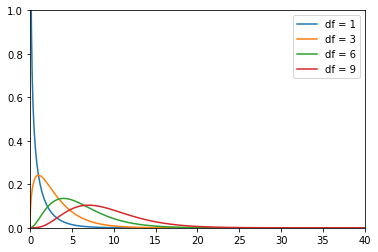

In [54]:
from scipy.stats import chi2

# Modelo teórico de juguete

# establecemos un umbral de variables aleatorias continuas. 
# Por ejemplo, de 0 a 100 en intervalos de .1
xs_ = np.arange(0, 1000, .1) # Pensemos que este es nuestro eje en $ 
x2s = [x**2 for x in xs_]# elevamos nuestra variable continua al cuadrado


for k in [1, 3, 6, 9]: # para distintos grados de libertad
    # ploteamos una línea con nuestro vector de x2 en x y 
    # la función de densidad/probabilidad en el y
    plt.plot(x2s, chi2.pdf(x2s, k), label='df = {0}'.format(k))

# limitamos y agregamos leyenda
plt.xlim(0, 40)
plt.ylim(0, 1)
plt.legend()
plt.show()


Ahora bien, ¿a qué nos referimos con los grados de libertad? 

La curva de distribución de χ2 tiene sesgo hacia la derecha y, a medida que aumenta el número de grados de libertad, la curva de χ2 será más similar a la distribución normal.

Los grados de libertad son la combinación del número de observaciones de un conjunto de datos que varían de manera aleatoria e independiente menos las observaciones que están condicionadas a estos valores arbitrarios.

En otras palabras, con cuántos casos hacemos nuestro test estadístico. Y acá es donde esta distribución se vuelve a cruzar con la normal. Cuantos más casos tenga nuestra muestra, mayor será el parecido a una normal.

Existen varios tipos de pruebas estadísticas que podemos hacer con la distribución χ2. En líneas generales, vamos a mencionar dos:

* Tests de asociación entre variables
* Tests de bondad de ajuste

En esta clase, sólo llegaremos a trabajar con los primeros. Sobre los últimos sólo diremos que se trata de tests que se llevan a cabo para hacer inferencias sobre la distribución de una variable (por ejemplo, si la distribución de una variable es normal o no).

Respecto de los primeros, vamos a trabajar con un test de hipótesis de medias en este notebook y con otro de frecuencias entre variables categóricas en el de visualización con `seaborn`.

Comencemos por nuestro primer interrogante.

**¿Es significativa la diferencia de ingresos de hogares con y sin hijos?**


Primero, construyamos una variable categórica para diferenciar nuestro `hogar de tipo a` del resto de la población. Es en esos términos que vamos a hacer la comparación.

In [57]:
# Hogares de hasta dos adultos 
eph_h['TIPO'] = 0 # con (C, B y OTROS)
eph_h.loc[(eph_h['IX_TOT']<=2)&(eph_h['IX_MEN10']==0),'TIPO'] = 1 # y sin hijos (A)
eph_h.groupby('TIPO').size()

TIPO
0    9214
1    7823
dtype: int64

Ahora bien, ¿qué nos va a estar indicando un test de medias?

Solemos decir que las diferencias entre muestras de una misma población son (o no) "estadísticamente significativas bajo un 95% de nivel de confianza".

Para interpretar esto, vamos a plantear una serie de posibilidades:

* **Ho:** no hay diferencias entre las medias poblacionales -> 
media de control - media de tratamiento = 0

* **Ha:** sí hay diferencias entre las medias poblacionales ->
 media de control - media de tratamiento != 0


El test de medias nos va a devolver distintas métricas, esto dependiendo de la implementación del test que usemos. El resultado más importante a tener en cuenta es el `p-value` o `p-valor`. 

Este es un estimador que nos indica cuan probable es que las medias de ambos grupos sean iguales entre sí. O en otras palabras, que la variable ITF siga la misma distribución normal o poblacional para los dos grupos (el de control y el de tratamiento).

Si lo pensamos un poco, es esperable que si las variables no están asociadas o son independientes entre sí, no haya ningún efecto recíproco que haga que sus medias sean distintas a la de la población. 

<img align="left" width="500" height="300" src="https://pro.arcgis.com/es/pro-app/2.8/tool-reference/spatial-statistics/GUID-CBF63B74-D1B2-44FC-A316-7AC2B1C1D464-web.png">

A mayor puntuación z, más desvío y por ende distancia respecto de la media. En la sección amarilla se ilustran los casos en los que el valor en cuestión (ITF) son iguales entre los grupos de tratamiento y de control.

Alpha (1.65, 1.96 y 2.58) representa el nivel de confianza que estamos dispuestos a aceptar. Es decir, un p-valor cercano a 0 nos indica que nos encontramos en zona de rechazo de hipótesis nula o de no asociación. 

Por ejemplo, si tomamos al azar n respondentes de un grupo de hogares y de otro y comparamos el el ingreso promedio, el 95% de las veces sus valores serán distintos entre sí. Esto es lo que nos permite rechazar la hipótesis nula.    

In [55]:
import researchpy as rp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


El método `rp.ttest` de la librería `researchpy` es una [implementación posible](https://researchpy.readthedocs.io/en/latest/ttest_documentation.html) del test de medias. 

In [58]:
# Veamos qué nos devuelve en función del tipo de hogar
summary, results = rp.ttest(group1= eph_h.loc[eph_h['TIPO']==1,'ITF'], group1_name= "ES TIPO A",
                            group2= eph_h.loc[eph_h['TIPO']==0,'ITF'], group2_name= "NO ES TIPO A")

In [59]:
summary

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,ES TIPO A,7823.00,57838.25,75851.90,857.59,56157.14,59519.35
1,NO ES TIPO A,9214.00,77984.89,77361.09,805.93,76405.09,79564.70
2,combined,17037.00,68734.01,77324.13,592.40,67572.84,69895.19


Lo primero que podemos decir es que con un 95% de confianza la media de ingresos de los hogares tipo A se ubicará entre 56157 y 59519 $ARS.

El `p-valor` en la tabla de resultados nos indica que esta diferencia negativa respecto del tipo de los hogares (un promedio de 20146 $ARS menos que el resto de los hogares)
es estadísticamente significativa. Es decir, que la presencia de hijos sí está asociada al nivel de ingresos de una familia. 

In [60]:
results

,Independent t-test,results
0,Difference (ES TIPO A - NO ES TIPO A) =,-20146.65
1,Degrees of freedom =,17035.00
2,t =,-17.09
3,Two side test p value =,0.00
4,Difference < 0 p value =,0.00
5,Difference > 0 p value =,1.00
6,Cohen's d =,-0.26
7,Hedge's g =,-0.26
8,Glass's delta =,-0.27
9,Pearson's r =,0.13


Otra implementación posible es la que ofrece `scipy` con la clase [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [61]:
from scipy.stats import ttest_ind
confianza = 0.95

ttest,pval = ttest_ind(eph_h.loc[eph_h['TIPO']==1,'ITF'],
                       eph_h.loc[eph_h['TIPO']==0,'ITF'],
                       equal_var=False # cuando hay varianzas o tamaños de muestra diferentes 
                       )
print("p-value",pval)
if pval < 1 - confianza:
  print("Rechazamos hipotesis nula. Hay relación")
else:
  print("Aceptamos hipotesis nula. No hay relación")

p-value 3.849955550264027e-65
Rechazamos hipotesis nula. Hay relación


Podemos constatar que la probabilidad de que las medias de ITF entre ambos grupos sean iguales sigue siendo muy baja.

Con esto, podemos concluir que sí existe una diferencia significativa en los niveles de ingresos de hogares de hasta dos adultos sin hijos.

Se animan a comparar los ingresos de los tipos de hogar que definimos anteriormente e interpretar los resultados? 

In [62]:
rp.ttest(group1= tipo_b.ITF, group1_name= "ES TIPO B",
         group2= tipo_c.ITF, group2_name= "ES TIPO C")

(    Variable       N     Mean        SD      SE  95% Conf.  Interval
 0  ES TIPO B  987.00 79278.09 103767.79 3302.97   72796.44  85759.74
 1  ES TIPO C  531.00 75569.06  74452.24 3230.95   69222.02  81916.11
 2   combined 1518.00 77980.66  94543.34 2426.58   73220.85  82740.48,
                       Independent t-test  results
 0  Difference (ES TIPO B - ES TIPO C) =   3709.03
 1                  Degrees of freedom =   1516.00
 2                                   t =      0.73
 3               Two side test p value =      0.47
 4              Difference < 0 p value =      0.77
 5              Difference > 0 p value =      0.23
 6                           Cohen's d =      0.04
 7                           Hedge's g =      0.04
 8                       Glass's delta =      0.04
 9                         Pearson's r =      0.02)

Si ahora quisiéramos establecer la diferencia entre los hogares de tipo B y C (dos adultos con uno o más menores), podríamos decir que esta no es significativa. Con un p-value de .47 es muy probable que las medias de ambos grupos poblacionales sean parecidas (algo más para reforzar la idea de que la presencia de hijos es lo que verdaderamente marca la diferencia en cuanto al nivel de ingresos) 

Ahora que pudimos dimensionar el peso que tienen nuestros tipos de hogar respecto de la demanda total, evaluemos la capacidad de pago de sus ingresos.

Para eso, comencemos por ordenar nuestra población por quintiles de ingreso ...

In [63]:
#  ... definir los puntos que delimitan el 10, 25, 50 y 75% de la serie ordenada de menor a mayor 
qcut = eph_h.ITF.quantile([.1,.25,.5,.75])
qcut

0.10       0.00
0.25   22000.00
0.50   56000.00
0.75   95600.00
Name: ITF, dtype: float64

In [64]:
# Armamos una función regular que devuelva la etiqueta del quintil de ingresos
def define_intervalo(x):
  if x <= qcut[.25]: 
    intervalo = 'Q1'
  elif (x > qcut[.25]) and (x < qcut[.5]):
    intervalo = 'Q2'
  elif (x >= qcut[.5]) and (x < qcut[.75]):
    intervalo = 'Q3'
  else:
    if (x >= qcut[.75]):
      intervalo = 'Q4'
    else:
      intervalo = 'raro no?' 
  return intervalo

In [65]:
# y la aplicamos con una función anónima
eph_h['ARS$qcut'] = eph_h.ITF.apply(lambda x: define_intervalo(x))
eph_h['ARS$qcut'].value_counts(normalize=True)

Q1   0.25
Q3   0.25
Q4   0.25
Q2   0.25
Name: ARS$qcut, dtype: float64

Ahora, veamos si los ingresos de los hogares superan el precio de los alquileres de referencia que habíamos considerado al inicio ...

In [66]:
eph_h['1_amb'] = eph_h['ITF'].apply(lambda x: x>amb_1)

También creamos una tabla pivot para contar la cantidad de hogares por debajo ("Inasequible") y por encima ("Asequible") del umbral de precios que aplicamos en nuestra función anónima.


In [67]:
# Para lo que creamos una tabla pivot contando la cantidad de casos por quintil
df = pd.pivot_table(data=eph_h, values='PONDERA', 
                    index=['1_amb','ARS$qcut'],
                    aggfunc='sum', margins=False)

df_ = df.reset_index().copy()
df_['1_amb'].replace({False:'Inasequible', True:'Asequible'}, inplace=True)
df_

,1_amb,ARS$qcut,PONDERA
0,Inasequible,Q1,3290595
1,Inasequible,Q2,511360
2,Asequible,Q2,1471643
3,Asequible,Q3,1989687
4,Asequible,Q4,2261155


Con esto, vamos a introducir un nuevo tipo de gráfico. El de tortas. Con este, vamos a ver qué porción de los hogares agrupados por quintiles de ingreso se encuentran en condiciones de pagar o no un alquiler de un departamento de un ambiente en la Ciudad de Buenos Aires.

In [68]:
def plotea_asequibilidad(df_,ref_idx,ref_val):
  # creamos nuestros ejes
  fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(10,8))

  # y los recorremos en una tupla junto a la etiqueta del quintil
  for ax in [(ax1,'Q1'),(ax2,'Q2'), (ax3,'Q3'), (ax4,'Q4')]:
    df__ = df_.loc[df_['ARS$qcut']==ax[1]] # filtramos por quintil
    
    if len(df__) == 1: # si solo tenemos una categoría en el quintil
      if 'Asequible' in df__[ref_idx].unique(): # y es "Asequible"
        colors=['lightgrey'] # definimos el color gris
      elif 'Inasequible' in df__[ref_idx].unique():
        colors=['salmon'] # en caso de ser "Inasequible", un color más colorado
      exp = [0]
    else:
      colors=['salmon','lightgrey'] # o sino los dos
      exp = [0,0.2]
    
    ax[0].pie(x=df__['PONDERA'],
              labels=df__[ref_idx],
              autopct='%1.1f%%',
              colors=colors,
              explode=exp,
              shadow=True,
              radius=1.15,
              textprops = dict(color ="black")
              ) # el gráfico de torta
    ax[0].set_title(ax[1], fontsize=12)
  plt.suptitle('Asequibilidad por quintiles (ARS$) para \n alquileres de {} ambiente (${})\n'.format(ref_idx,ref_val), 
              color='black',
              fontsize=15);

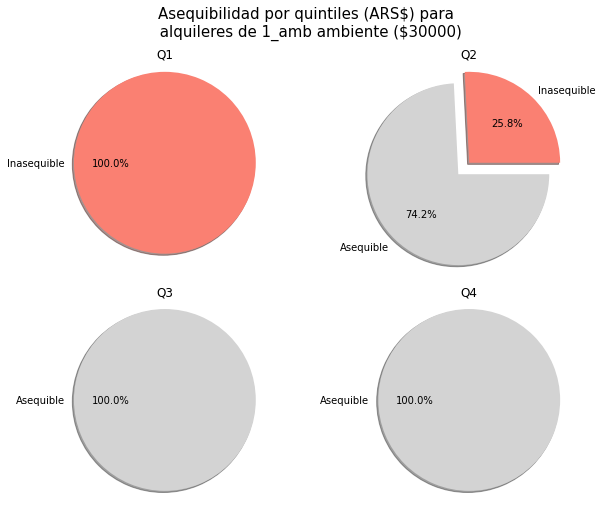

In [69]:
plotea_asequibilidad(df_,'1_amb',amb_1)

Ahora, podemos distinguir a nuestra población según si cuentan con la capacidad de pago suficiente para afrontar el gasto mensual de un alquiler promedio de un ambiente.

Lo que nos muestran las tortas, es que para la totalidad de los hogares del primer quintil (los de ingresos más bajos) un alquiler de $30.000 resulta inasequible. El corte recién comienza en el segundo quintil, donde sólo es inasequible para un 26%. El 74% restante se encuentra por encima de ese valor de referencia.

Y ahora que tenemos esta línea de base como referencia. Armemos un flujo de trabajo ordenado que nos permita hacer todos estos pasos un una misma función para determinar la capacidad de pago de los tres perfiles de hogar.

In [70]:
def asequibilidad_vivienda(df, ref_idx, ref_val):
  '''
  Devuelve la cantidad de hogares por quintil 
  de ingresos con ITF por encima/debajo de un valor  
  
  Args
  ----
  
  Returns
  -------
  pd.DataFrame
  '''
  df['ARS$qcut'] = df.ITF.apply(lambda x: define_intervalo(x))
  df[ref_idx] = df['ITF'].apply(lambda x: x>ref_val)

  df_ = pd.pivot_table(data=df, values='PONDERA', 
                       index=[ref_idx,'ARS$qcut'],
                       aggfunc='sum', margins=False)

  df__ = df_.reset_index().copy()
  df__[ref_idx].replace({False:'Inasequible', True:'Asequible'}, inplace=True)
  return df__

In [71]:
asequibilidad_vivienda(df=tipo_a, ref_idx='1_amb', ref_val=amb_1)

,1_amb,ARS$qcut,PONDERA
0,Inasequible,Q1,1282634
1,Inasequible,Q2,374247
2,Asequible,Q2,797014
3,Asequible,Q3,860202
4,Asequible,Q4,718407


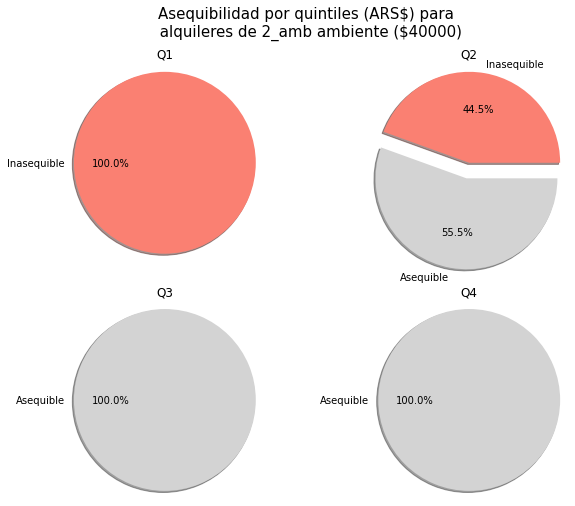

In [72]:
aseq_df = asequibilidad_vivienda(df=tipo_b, ref_idx='2_amb', ref_val=amb_2)
plotea_asequibilidad(aseq_df,'2_amb',amb_2)

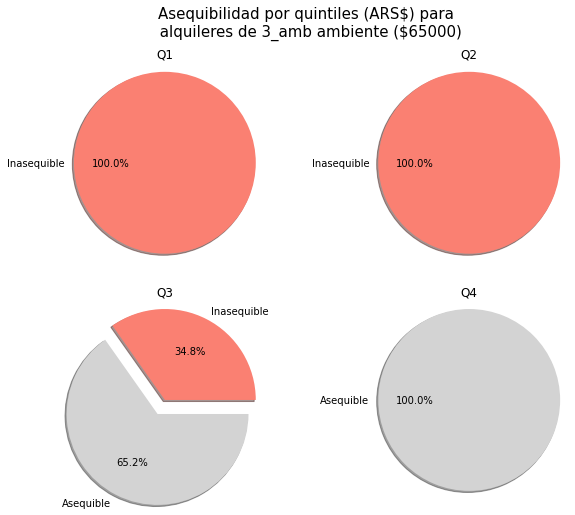

In [73]:
aseq_df = asequibilidad_vivienda(df=tipo_c, ref_idx='3_amb', ref_val=amb_3)
plotea_asequibilidad(aseq_df,'3_amb',amb_3)